In [38]:
import os.path
import sys
import logging

import pandas
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline

In [39]:
# use this stylesheet
matplotlib.style.use('ggplot')

# get the filename from the first command line argument (0=script, 1=filename)
filename = sys.argv[1]
try:
    assert os.path.isfile(filename), 'First command line argument should be a filename, %s is not a file' % (filename, )
except AssertionError:
    logging.exception("Command line error")
    filename = '/Users/baart_f/data/sobek/Totalarea_h_x1800m.fix'
    #filename = '/Users/baart_f/data/sobek/Discharge_B2.fix'

ERROR:root:Command line error
Traceback (most recent call last):
  File "<ipython-input-39-f2652db55d7a>", line 7, in <module>
    assert os.path.isfile(filename), 'First command line argument should be a filename, %s is not a file' % (filename, )
AssertionError: First command line argument should be a filename, -f is not a file


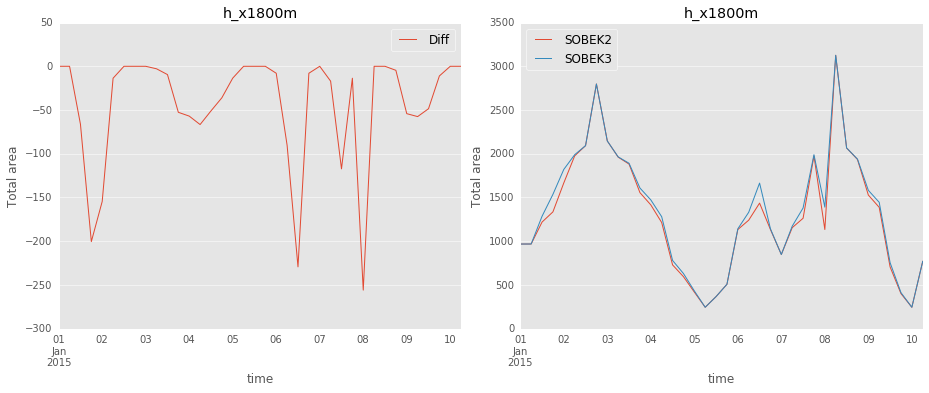

In [40]:
# read file, assuming multiple space separted columns (no spaces in parameters or locations)
widths = [25, 25, 11, 14, 18, 18, 14]
df = pandas.read_fwf(filename, widths=widths,  skiprows=2, parse_dates=[['Date', 'Time']])

# generate 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(13, 5.5))

# assuming only 1 parameter, location per file
parameters = set(df['Parameter'])
locations = set(df['Location'])
assert len(locations) == 1, 'Expected 1 location'
assert len(parameters) == 1, 'Expected exactly 1 parameter'
location, parameter = list(locations)[0], list(parameters)[0]

# plot in the two axes
df.plot('Date_Time', ['Diff'], ax=axes[0])
axes[0].set_title(location)
axes[0].set_ylabel(parameter)
axes[0].set_xlabel('time')
df.plot('Date_Time', ['SOBEK2', 'SOBEK3'], ax=axes[1])
axes[1].set_title(location)
axes[1].set_ylabel(parameter)
axes[1].set_xlabel('time')
fig.tight_layout()

# save the figure
outfilename = '{parameter} {location}.png'.format(location=location, parameter=parameter)
fig.savefig(outfilename)

In [41]:
df

,Date_Time,Parameter,Location,SOBEK2,SOBEK3,Diff
0,2015-01-01 00:00:00,Total area,h_x1800m,967.1875,967.1875,0.000000
1,2015-01-01 06:00:00,Total area,h_x1800m,967.5520,967.5413,0.010681
2,2015-01-01 12:00:00,Total area,h_x1800m,1218.2710,1284.5570,-66.285770
3,2015-01-01 18:00:00,Total area,h_x1800m,1334.8800,1535.3900,-200.509600
4,2015-01-02 00:00:00,Total area,h_x1800m,1665.9720,1820.5570,-154.584700
5,2015-01-02 06:00:00,Total area,h_x1800m,1975.2270,1988.8500,-13.623170
6,2015-01-02 12:00:00,Total area,h_x1800m,2092.5520,2092.5520,0.000000
7,2015-01-02 18:00:00,Total area,h_x1800m,2797.5490,2797.5490,0.000000
8,2015-01-03 00:00:00,Total area,h_x1800m,2146.0630,2146.0630,0.000000
9,2015-01-03 06:00:00,Total area,h_x1800m,1960.9100,1963.7890,-2.878418
